In [ ]:
# Import essential libralies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

# Import other libralies
import os
import sys

# Import our own libralies
sys.path.append("../lib/")
import eyegaze as eg

Populating the interactive namespace from numpy and matplotlib


## Load gaze data recorded by Tobii eye tracker

In [ ]:
def v(data, column):
    return data[column].values

def readTobiiData(target_dir):
    data = pd.read_csv(target_dir+"tobii_gaze.csv")
    gaze_x = v(data, "gaze_x")
    gaze_y = v(data, "gaze_y")
    data = np.vstack((v(data,"#timestamp")*0.001, gaze_x, gaze_y)).T

    edata = pd.read_csv(target_dir+"mouse_event.csv")
    events = v(edata, "#timestamp")
    diff = events[0] - data[0][0]
    events = events - diff
    
    return [np.array([d for d in data if events[i-1] < d[0] and d[0] < events[i]]) for i in range(1, len(events))]

def readEvents(path):
    data = pd.read_csv(path)
    return v(data, "#timestamp")*0.001

In [ ]:
target_dir = "../../data/input/tobii_2017-03-14_10-38-36/"
all_data = readTobiiData(target_dir)

## Visualize gaze data

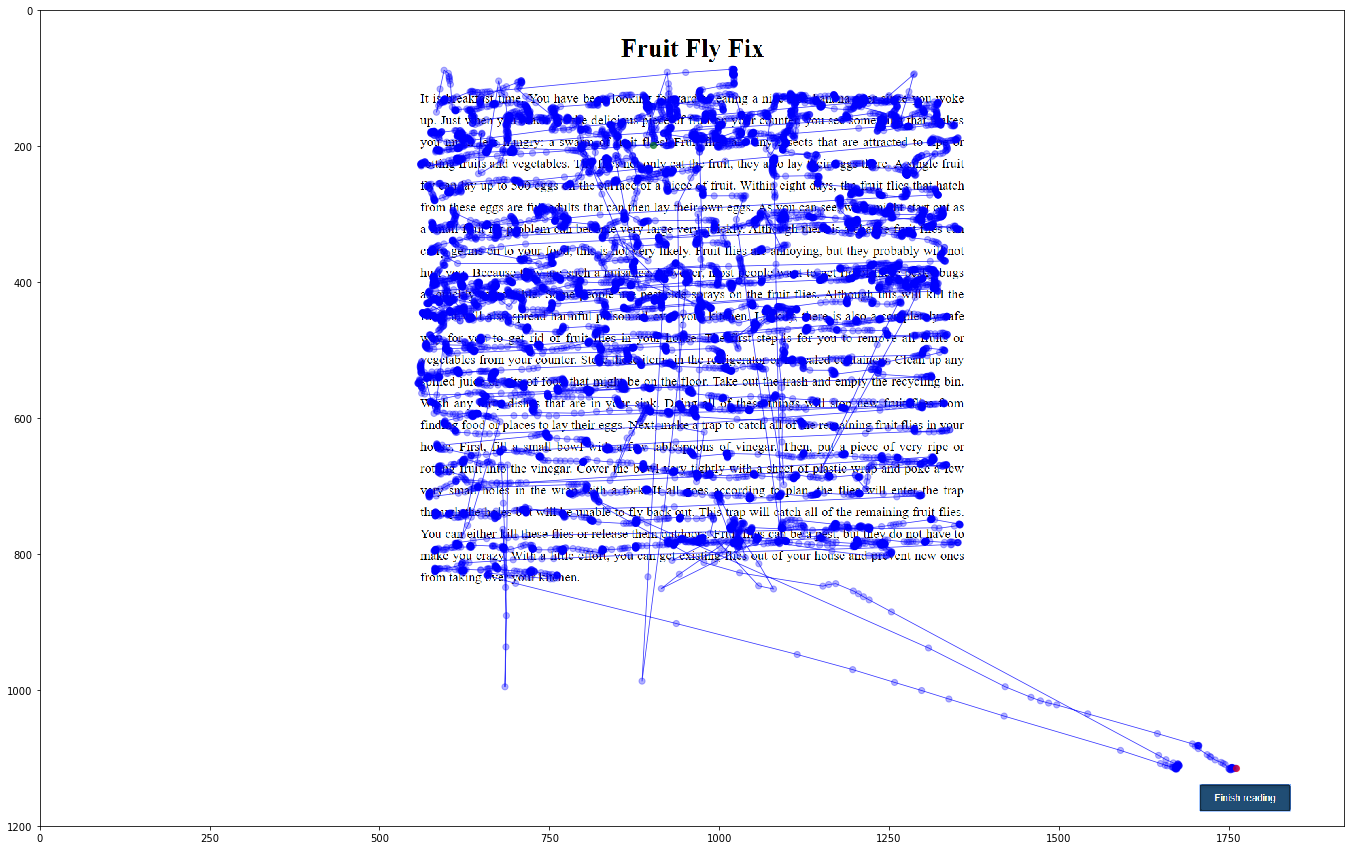

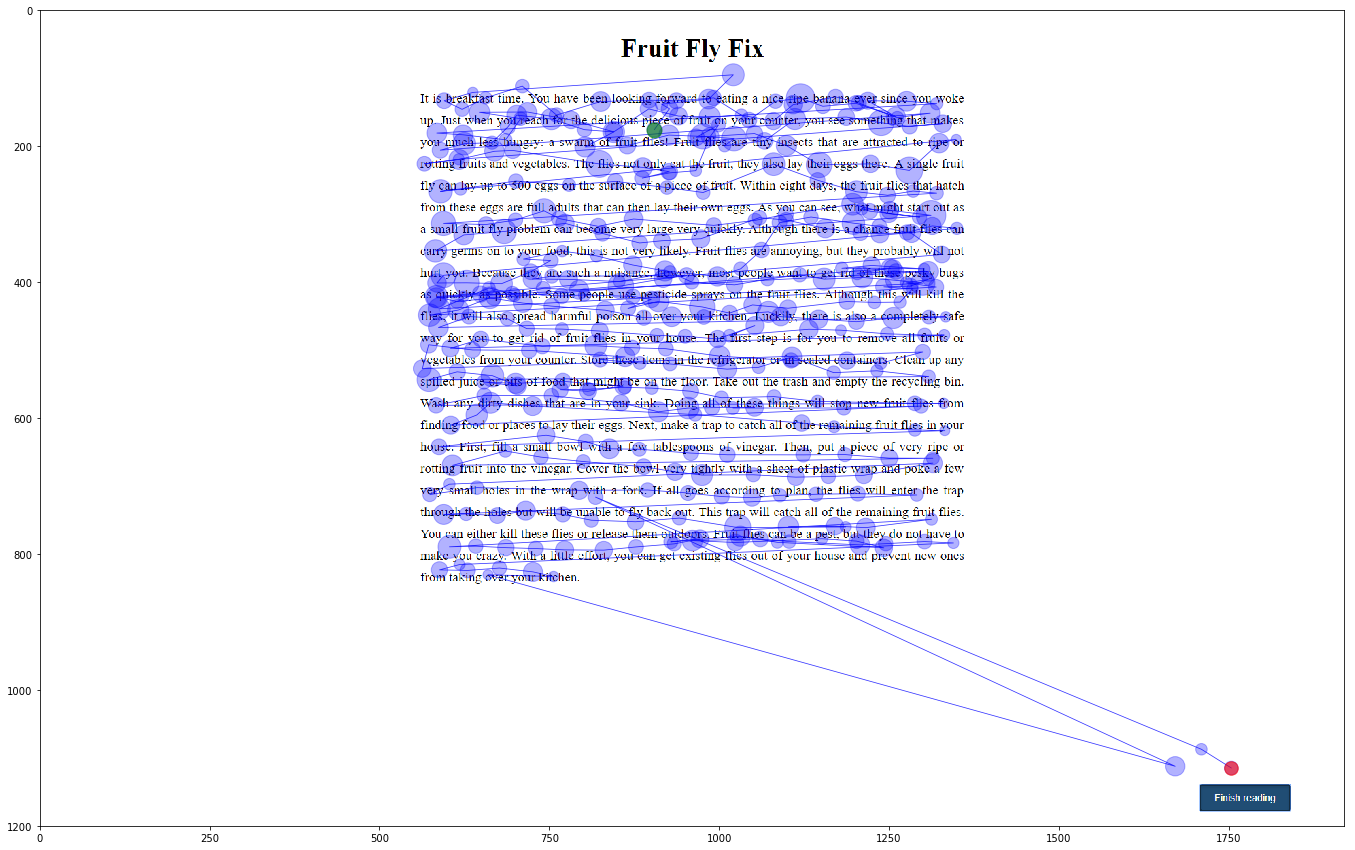

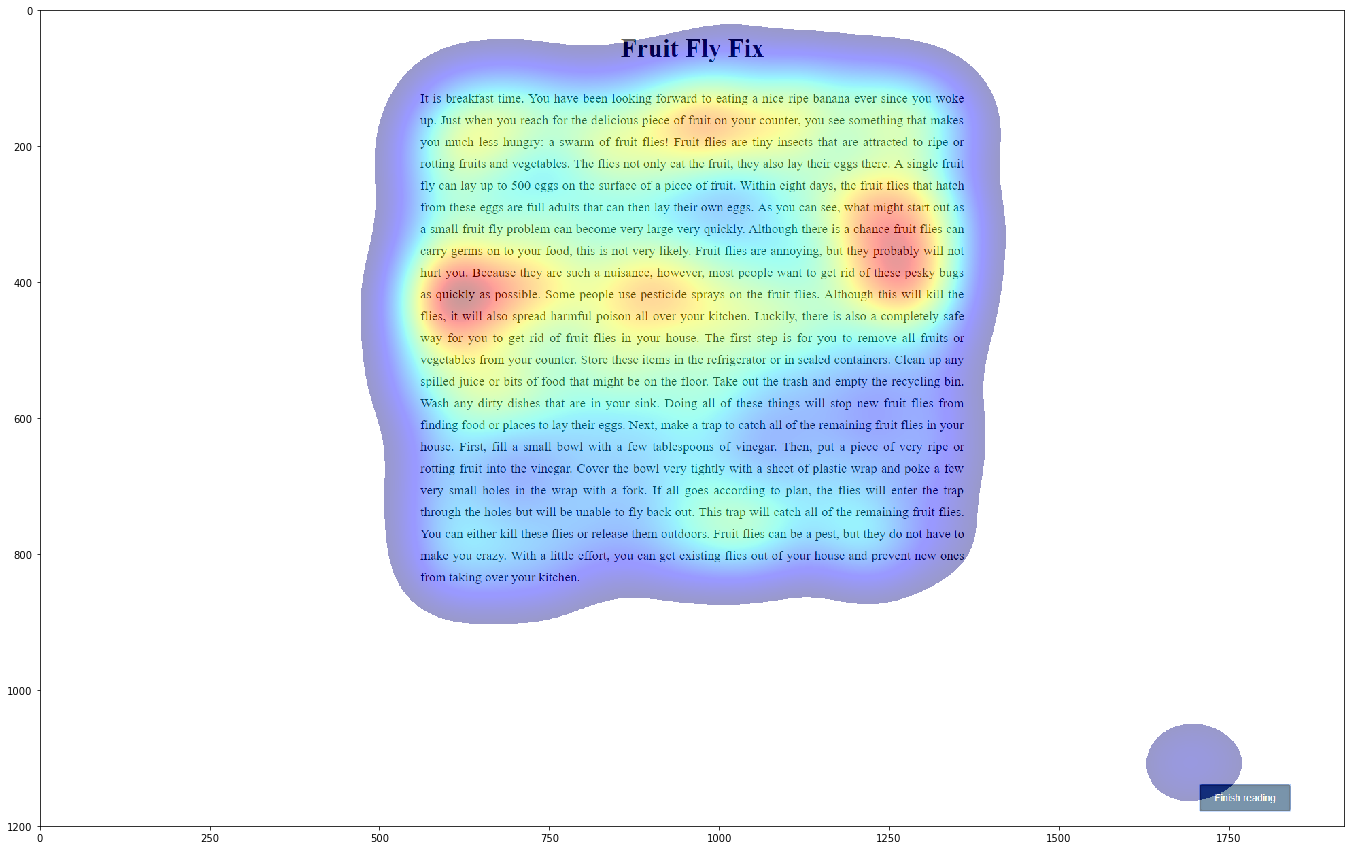

In [ ]:
data = all_data[0]
image_path = target_dir+"002_back.png"

eg.plotScanPath(data[:, 1], data[:, 2], np.array([50.0 for x in data]), bg_image=image_path)

# Fixation-saccade detection proposed by Buscher et al. (2008)
fx = eg.detectFixations(data[:, 0], data[:, 1], data[:, 2],
                        min_concat_gaze_count=9, min_fixation_size=20, max_fixation_size=40)

eg.plotScanPath(fx[:, 1], fx[:, 2], fx[:, 3], bg_image=image_path)

eg.plotHeatmap(fx[:, 1], fx[:, 2], fx[:, 3], bg_image=image_path)

## Export

In [ ]:
for i, data in enumerate(all_data):
    bi = str(i+2).zfill(3)
    image_path = target_dir+bi+"_back.png"
    
    od = "../../data/output/gaze_raw/"
    if not os.path.exists(od):
        os.makedirs(od)
    eg.plotScanPath(data[:, 1], data[:, 2], np.array([50.0 for x in data]), 
                    bg_image=image_path, save_path=od+bi+".png")

    fx = eg.detectFixations(data[:, 0], data[:, 1], data[:, 2],
                            min_concat_gaze_count=9, min_fixation_size=20, max_fixation_size=40)
    
    od = "../../data/working/fixation/"
    if not os.path.exists(od):
        os.makedirs(od)
    np.savetxt(od+bi+".csv", fx, delimiter=',', header='timstamp, x, y, duration')
    
    od = "../../data/output/scan_path/"
    if not os.path.exists(od):
        os.makedirs(od)
    eg.plotScanPath(fx[:, 1], fx[:, 2], fx[:, 3],
                    bg_image=image_path, save_path=od+bi+".png")
    
    od = "../../data/output/heatmap/"
    if not os.path.exists(od):
        os.makedirs(od)
    eg.plotHeatmap(fx[:, 1], fx[:, 2], fx[:, 3],
                   bg_image=image_path, save_path=od+bi+".png")